<a href="https://colab.research.google.com/github/akshay777-aar/Supervised-Learning-ML-/blob/main/Supervised_learning_Beer_Serving_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving beer-servings.csv to beer-servings (1).csv


In [4]:
data = pd.read_csv("beer-servings.csv", index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [5]:
data.isnull().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [6]:
data.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [7]:
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,185.000000,185.000000,187.000000,192.000000
mean,105.124324,83.221622,50.165775,4.741667
std,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,60.000000,9.000000,4.250000
75%,185.000000,132.000000,60.500000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [8]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [9]:
#using median to fillup null
for i in ['beer_servings', 'spirit_servings','wine_servings', 'total_litres_of_pure_alcohol']:
  data[i]=data[i].fillna(data[i].median())

In [10]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [11]:
#to get the basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    float64
 2   spirit_servings               193 non-null    float64
 3   wine_servings                 193 non-null    float64
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


Visualization

<Figure size 3000x2500 with 0 Axes>

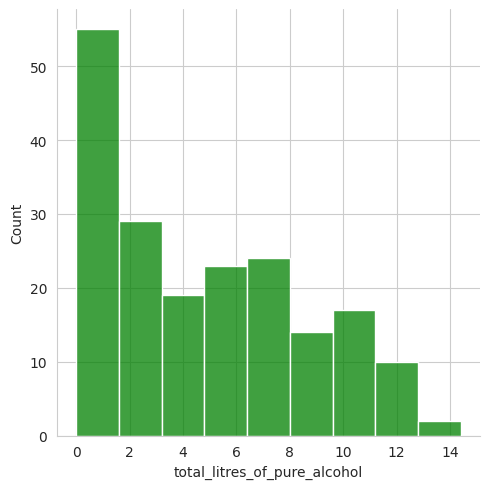

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(30,25))
sns.displot(data['total_litres_of_pure_alcohol'],color='green')
plt.show()

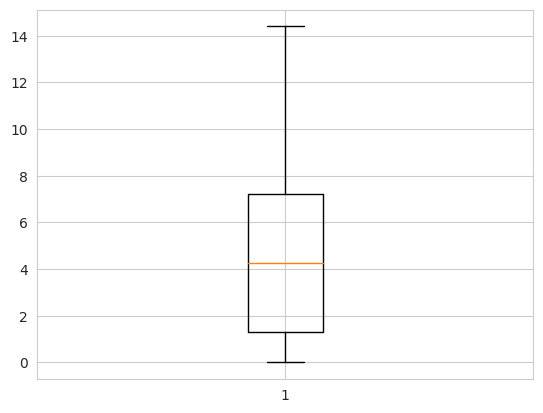

In [13]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.show()

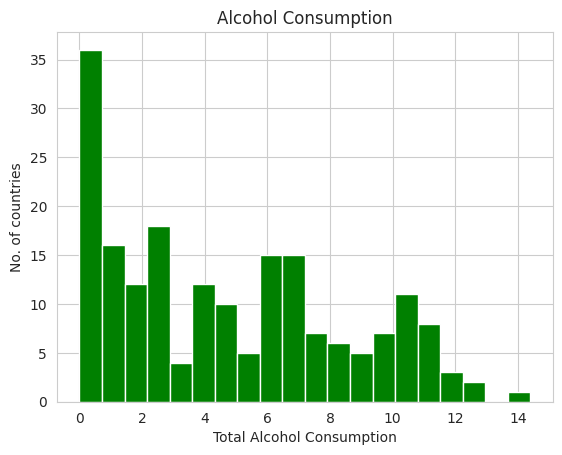

In [14]:
plt.hist(data['total_litres_of_pure_alcohol'], color='green', bins = 20)
plt.xlabel('Total Alcohol Consumption')
plt.ylabel('No. of countries')
plt.title('Alcohol Consumption')
plt.show()

In [15]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

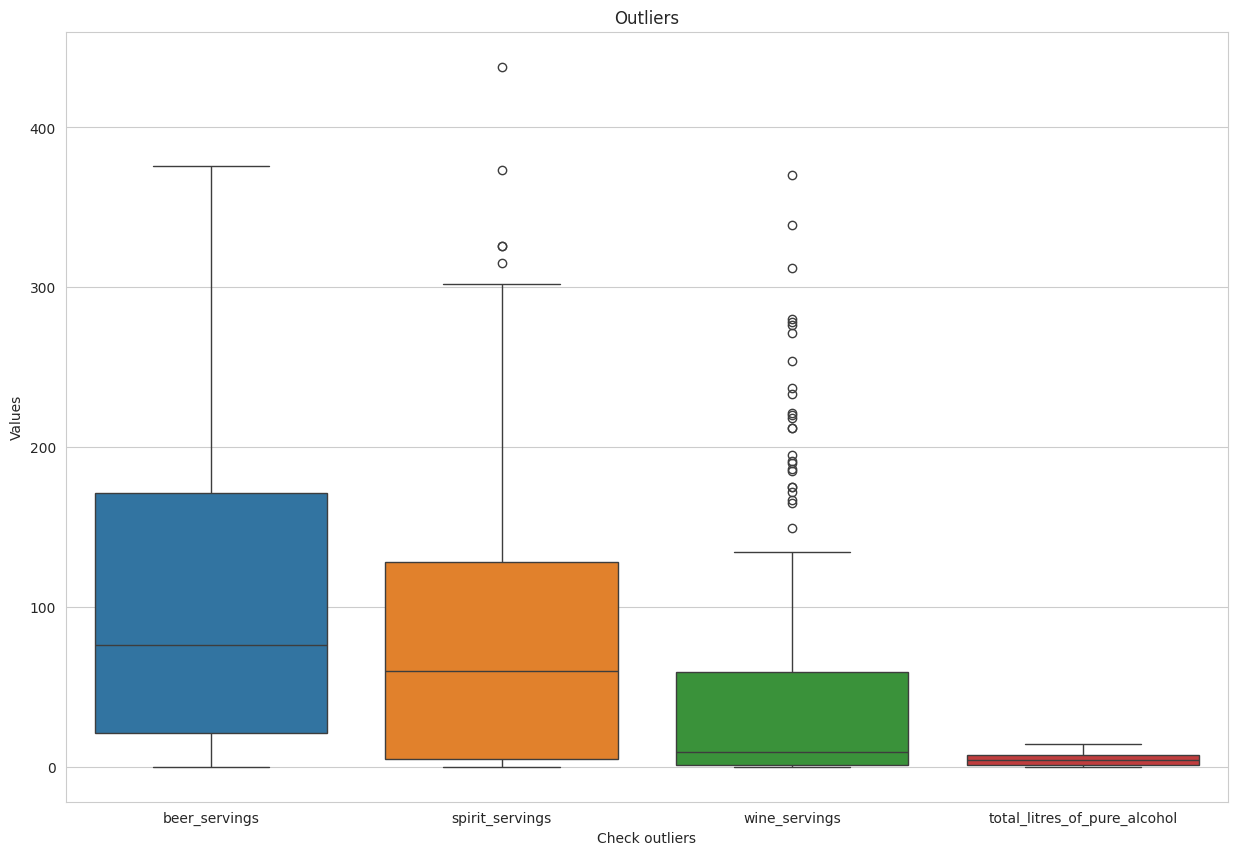

In [16]:
numerical_columns = ['beer_servings', 'spirit_servings','wine_servings', 'total_litres_of_pure_alcohol']
plt.figure(figsize=(15,10))
sns.boxplot(data=data[numerical_columns])
plt.xlabel('Check outliers')
plt.ylabel('Values')
plt.title('Outliers')
plt.show()

In [17]:
outlier_column = ['spirit_servings','wine_servings']

Q1 = data[outlier_column].quantile(0.25)
Q3 = data[outlier_column].quantile(0.75)
IQR = Q3 - Q1

outlier_lower = data[outlier_column] < (Q1 - 1.5 * IQR)
outlier_upper = data[outlier_column] > (Q3 + 1.5 * IQR)

data[outlier_column] = np.where(outlier_lower, Q1, data[outlier_column])
data[outlier_column] = np.where(outlier_upper, Q3, data[outlier_column])

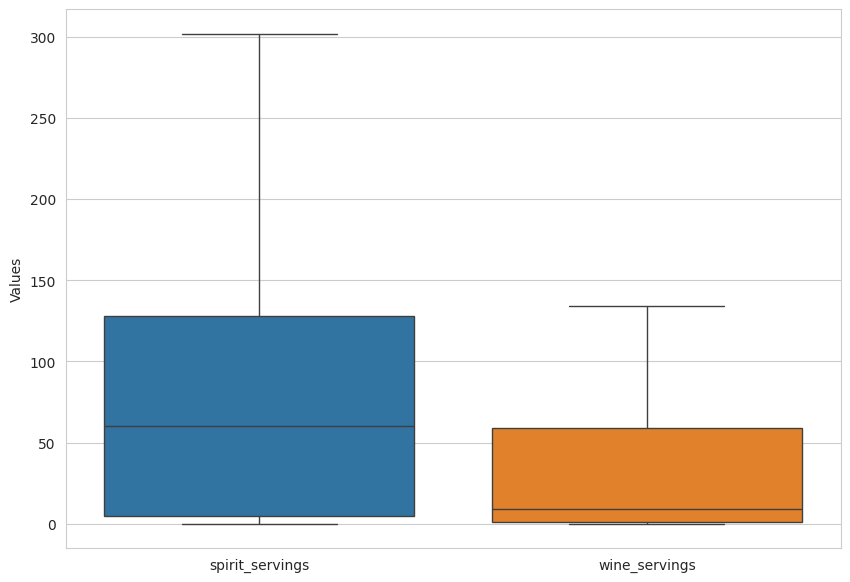

In [18]:
outlier_recheck = ['spirit_servings','wine_servings']
plt.figure(figsize=(10,7))
sns.boxplot(data=data[outlier_recheck])
plt.ylabel('Values')
plt.show()

In [19]:
data['country'].nunique()

193

In [20]:
data['country'].value_counts()

country
Afghanistan    1
Libya          1
Niger          1
Nigeria        1
Niue           1
              ..
Greece         1
Grenada        1
Guatemala      1
Guinea         1
Zimbabwe       1
Name: count, Length: 193, dtype: int64

In [21]:
data.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [22]:
data.continent.value_counts()

continent
Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: count, dtype: int64

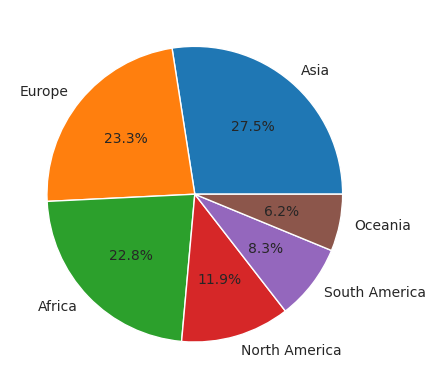

In [23]:
cont = data['continent'].value_counts()
p_color = sns.color_palette('pastel')
plt.pie(data.continent.value_counts(), labels=data.continent.unique(), autopct='%1.1f%%')
plt.show()

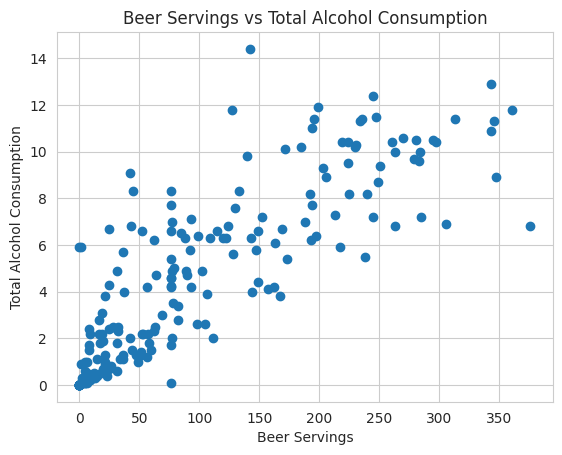

In [24]:
x_s1 = data['beer_servings']
y_s1 = data['total_litres_of_pure_alcohol']

plt.scatter(x_s1,y_s1)
plt.xlabel('Beer Servings')
plt.ylabel('Total Alcohol Consumption')
plt.title('Beer Servings vs Total Alcohol Consumption')
plt.show()

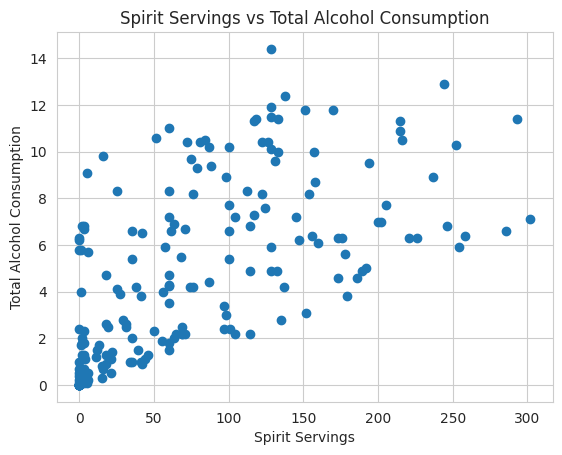

In [25]:
x_s2 =data['spirit_servings']
y_s2 = data['total_litres_of_pure_alcohol']

plt.scatter(x_s2,y_s2)
plt.xlabel('Spirit Servings')
plt.ylabel('Total Alcohol Consumption')
plt.title('Spirit Servings vs Total Alcohol Consumption')
plt.show()

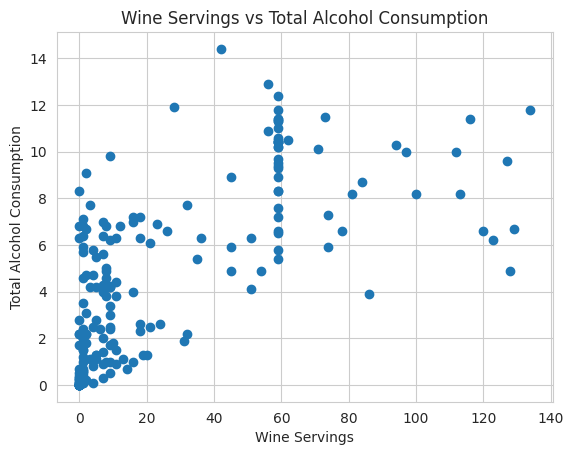

In [26]:
x_s3 = data['wine_servings']
y_s3 = data['total_litres_of_pure_alcohol']

plt.scatter(x_s3,y_s3)
plt.xlabel('Wine Servings')
plt.ylabel('Total Alcohol Consumption')
plt.title('Wine Servings vs Total Alcohol Consumption')
plt.show()

In [27]:
data.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [28]:
data.drop('country', axis=1, inplace=True)

continent_mapping ={
    'Africa':0,
    'Asia':1,
    'Europe':2,
    'Oceania':3,
    'South America':4,
    'North America':5
}

data['continent'] = data['continent'].map(continent_mapping)


In [29]:
data.continent.value_counts()

continent
0    53
2    45
1    44
5    23
3    16
4    12
Name: count, dtype: int64

In [30]:
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,1
1,89.0,132.0,54.0,4.9,2
2,25.0,0.0,14.0,0.7,0
3,245.0,138.0,59.0,12.4,2
4,217.0,57.0,45.0,5.9,0


In [31]:
#CORRELATION
corr=data.corr()
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
beer_servings,1.000000,0.496211,0.618717,0.829418,0.344580
spirit_servings,0.496211,1.000000,0.406992,0.631608,0.473263
wine_servings,0.618717,0.406992,1.000000,0.678284,0.208524
total_litres_of_pure_alcohol,0.829418,0.631608,0.678284,1.000000,0.333160
continent,0.344580,0.473263,0.208524,0.333160,1.000000


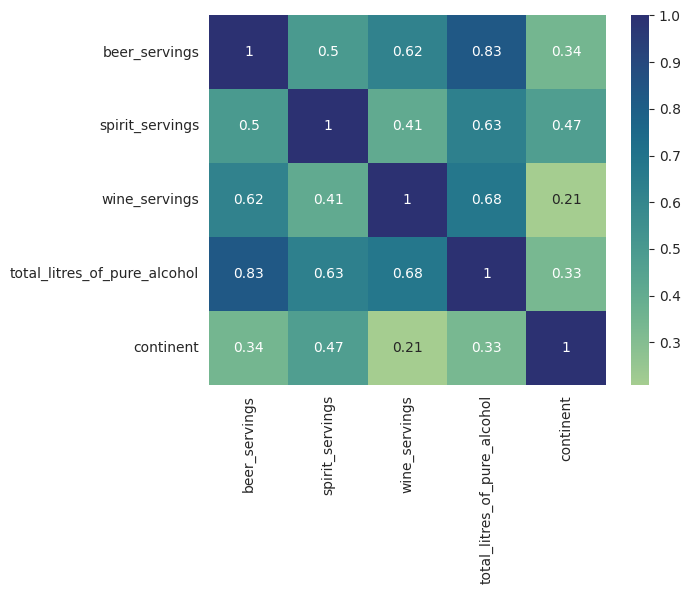

In [32]:
sns.heatmap(corr, annot=True, cmap='crest')
plt.show()

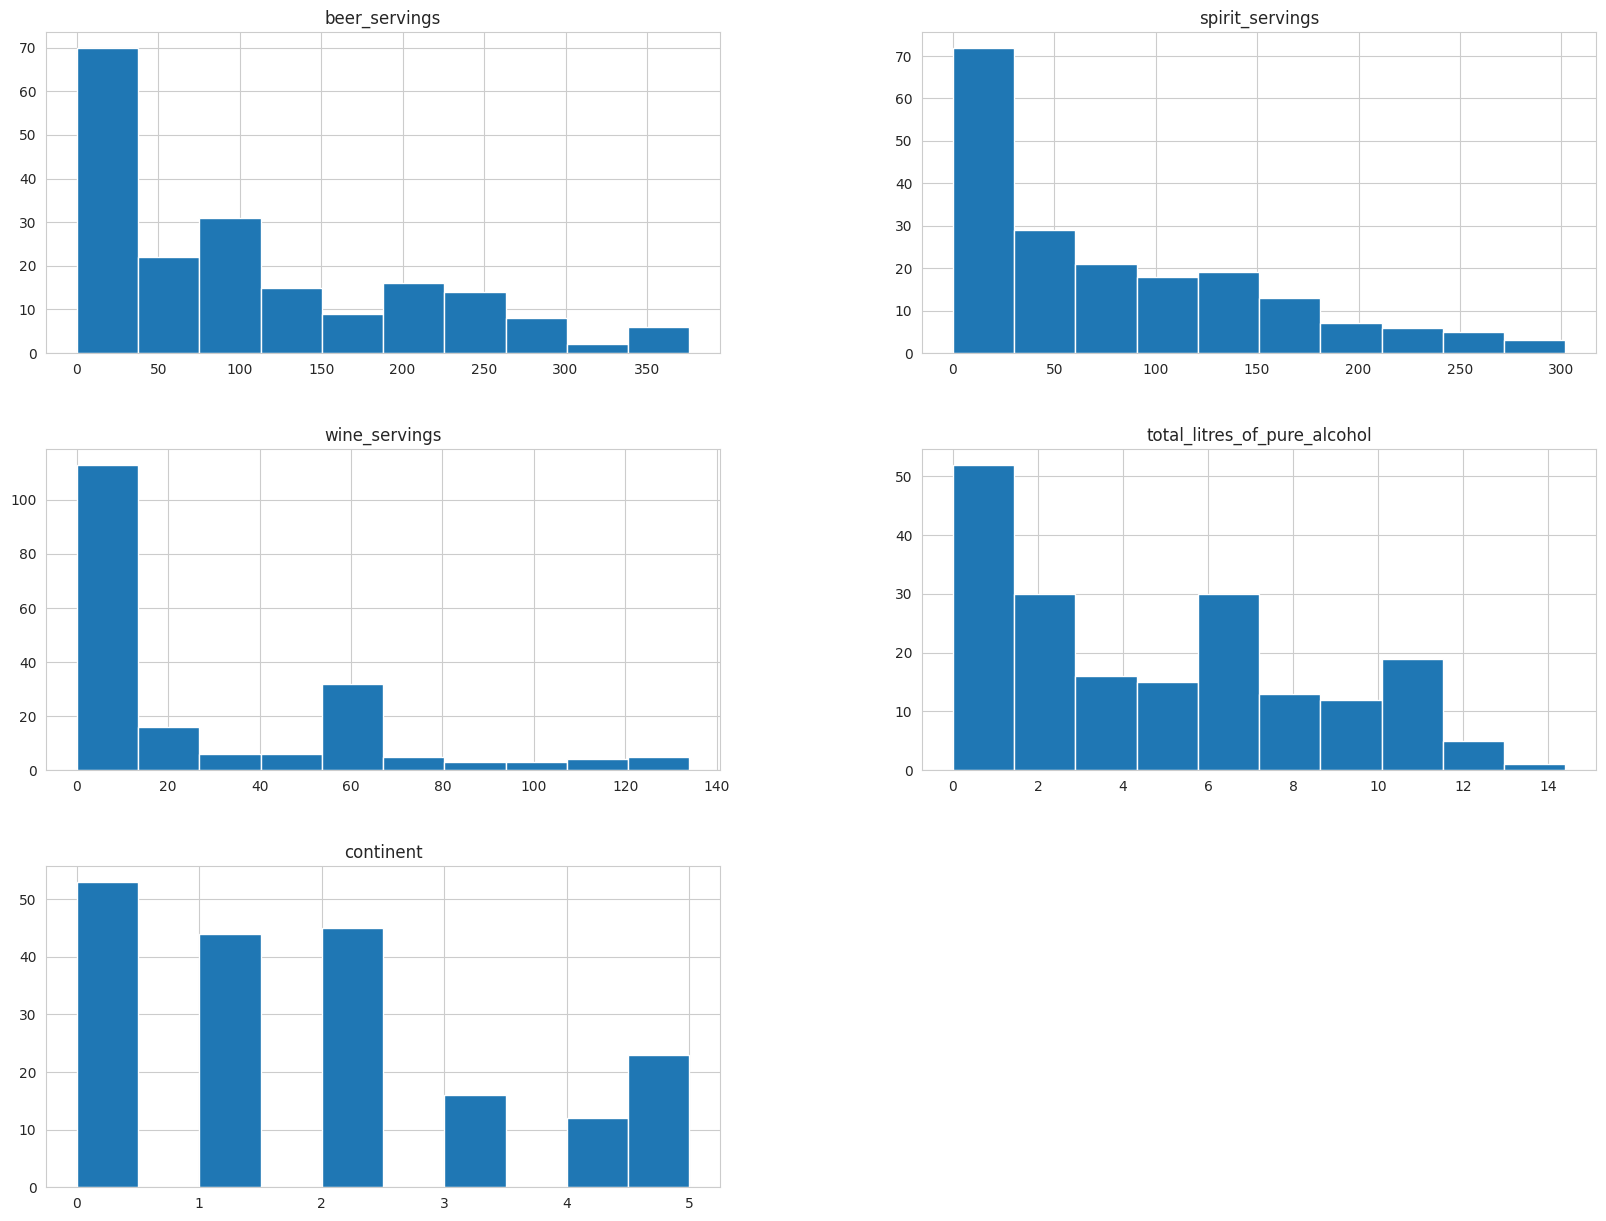

In [33]:
freqgraph = data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [34]:
# MODELLING
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,1
1,89.0,132.0,54.0,4.9,2
2,25.0,0.0,14.0,0.7,0
3,245.0,138.0,59.0,12.4,2
4,217.0,57.0,45.0,5.9,0


In [35]:
# defining x and y
y = data['total_litres_of_pure_alcohol']
x = data.drop('total_litres_of_pure_alcohol', axis=1)

In [36]:
x.head()

,beer_servings,spirit_servings,wine_servings,continent
0,0.0,0.0,0.0,1
1,89.0,132.0,54.0,2
2,25.0,0.0,14.0,0
3,245.0,138.0,59.0,2
4,217.0,57.0,45.0,0


In [37]:
data.shape

(193, 5)

In [38]:
x.shape

(193, 4)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
#x_train.shape

In [41]:
#x_test.shape

**Scaling**

In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [43]:
x1 = x.drop('continent', axis=1)
x1.head()

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,59.0
4,217.0,57.0,45.0


In [44]:
type(x1)

pandas.core.frame.DataFrame

In [45]:
x1 = ss.fit_transform(x1)

In [46]:
type(x1)

numpy.ndarray

In [47]:
x1

array([[-1.05687979, -1.0180091 , -0.78589367],
       [-0.15171305,  0.74171406,  0.82452391],
       [-0.80261947, -1.0180091 , -0.368378  ],
       [ 1.43487136,  0.82170147,  0.97363665],
       [ 1.1500998 , -0.25812865,  0.55612098],
       [-0.01949768,  0.68838911,  0.55612098],
       [-0.28392842, -0.6847282 ,  0.97363665],
       [-0.84330112,  1.36828215, -0.45784564],
       [ 1.59759796, -0.05816011,  0.97363665],
       [ 1.78066539, -0.0181664 ,  0.97363665],
       [-0.84330112, -0.40477224, -0.63678093],
       [ 0.18391057,  1.32828844,  0.73505627],
       [-0.62972245, -0.17814123, -0.57713583],
       [-0.28392842, -0.21813494, -0.51749074],
       [ 0.39748924,  1.28829473,  0.28771805],
       [ 0.38731883,  0.68838911,  0.46665334],
       [ 1.943392  ,  0.10181473,  0.97363665],
       [ 1.61793879,  0.50175181, -0.54731329],
       [-0.71108576, -0.96468416, -0.39820055],
       [-0.8229603 , -1.0180091 , -0.78589367],
       [ 0.64157915, -0.47142842, -0.547

In [48]:
x.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings', 'continent'], dtype='object')

In [49]:
# Converting x1 from array to dataframe

x1 = pd.DataFrame(x1, columns=['beer_servings', 'spirit_servings', 'wine_servings'])
x1.head()

,beer_servings,spirit_servings,wine_servings
0,-1.056880,-1.018009,-0.785894
1,-0.151713,0.741714,0.824524
2,-0.802619,-1.018009,-0.368378
3,1.434871,0.821701,0.973637
4,1.150100,-0.258129,0.556121


In [50]:
x.head()

,beer_servings,spirit_servings,wine_servings,continent
0,0.0,0.0,0.0,1
1,89.0,132.0,54.0,2
2,25.0,0.0,14.0,0
3,245.0,138.0,59.0,2
4,217.0,57.0,45.0,0


In [51]:
# Dropping the unscaled values from x

x.drop(['beer_servings', 'spirit_servings', 'wine_servings'], axis=1, inplace=True)
x.head()

,continent
0,1
1,2
2,0
3,2
4,0


In [52]:
# Adding scaled values from x1 to x

x = pd.concat([x1, x], axis=1)
x.head()

,beer_servings,spirit_servings,wine_servings,continent
0,-1.056880,-1.018009,-0.785894,1
1,-0.151713,0.741714,0.824524,2
2,-0.802619,-1.018009,-0.368378,0
3,1.434871,0.821701,0.973637,2
4,1.150100,-0.258129,0.556121,0


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Linear Regression**

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [55]:
model1 = lr.fit(x_train, y_train)

In [56]:
y_pred1 = model1.predict(x_test)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
mean_squared_error(y_test, y_pred1)

4.041173056156888

In [59]:
r2_score(y_test, y_pred1)

0.8092117758197652

**Predicting for new values**

In [60]:
def preprocess_and_predict(new_model,model1, continent_mapping,ss):
  # Encoding
  new_data['continent'] = new_data['continent'].map(continent_mapping)

  # Scaling
  new_data_scaled = new_data.copy()
  new_data_scaled[['beer_servings', 'spirit_servings', 'wine_servings']] = ss.transform(new_data[['beer_servings', 'spirit_servings', 'wine_servings']])

  # Prediction
  prediction = model1.predict(new_data_scaled)
  return prediction

In [61]:
new_data = pd.DataFrame({
    'beer_servings':[25],
    'spirit_servings':[0],
    'wine_servings':[14],
    'continent':'Africa'
})

prediction = preprocess_and_predict(new_data,model1, continent_mapping,ss)
print(prediction)

[1.95662244]


In [62]:
# Other predictions

new_data = pd.DataFrame({
    'beer_servings':[89],
    'spirit_servings':[132],
    'wine_servings':[54],
    'continent':'Europe'
})

prediction = preprocess_and_predict(new_data,model1, continent_mapping,ss)
print(prediction)

[5.88327234]


In [63]:
new_data = pd.DataFrame({
    'beer_servings':[245],
    'spirit_servings':[138],
    'wine_servings':[59],
    'continent':'Europe'
})

prediction = preprocess_and_predict(new_data,model1, continent_mapping,ss)
print(prediction)

[9.39631445]


**Using SVR**

In [64]:
from sklearn.svm import SVR

In [65]:
svm_model = SVR(kernel='linear')
svm_model = svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
print(r2_score(y_test, svm_pred))
print(mean_squared_error(y_test, svm_pred))

0.7759919241405018
4.744818001292212


In [66]:
def preprocess_and_predict(new_model,svm_model, continent_mapping,ss):
  # Encoding
  new_data['continent'] = new_data['continent'].map(continent_mapping)

  # Scaling
  new_data_scaled = new_data.copy()
  new_data_scaled[['beer_servings', 'spirit_servings', 'wine_servings']] = ss.transform(new_data[['beer_servings', 'spirit_servings', 'wine_servings']])

  # Prediction
  prediction = svm_model.predict(new_data_scaled)
  return prediction

In [67]:
new_data = pd.DataFrame({
    'beer_servings':[25],
    'spirit_servings':[0],
    'wine_servings':[14],
    'continent':'Africa'
})

prediction = preprocess_and_predict(new_data,svm_model, continent_mapping,ss)
print(prediction)

[0.94048477]
